In [137]:
import pandas as pd
import numpy as np
from statsmodels.stats import inter_rater as irr
import krippendorff as kd
import seaborn as sns

In [138]:
eval_df = pd.read_csv("./data/eval.csv").drop(columns=["Unnamed: 0"])
eval_df = eval_df.set_index(eval_df.columns[:7].tolist())

In [139]:
themes_crit = {
    "Choix de l'information": ['CI3', 'CI4', 'CI5', 'CI6', 'CI8'],
    "Choix des mots": ['CPM2', 'CPM3', 'CPM4',
       'CPM5', 'CPM6', 'CPM8', 'CPM9',  'CPM16', 'CPM17', 'CPM18', 'CPM19',
       'CPM20', 'CPM21'],
    "Construction des phrases": [
        'CPM1', "CPM7", "CPM10", "CPM11", "CPM12", 'CPM13', 'CPM14','CPM15',
    ],
    "Illustrations": ['I1', 'I2'],
    "Qualité globale": ['CA1', 'CA2', 'CA3', 'CA4',
       'CA5', 'CA6', 'CA7', 'CA8'],
}
crit_themes = {crit: domain for domain, crits in themes_crit.items() for crit in crits}
qual_crits = themes_crit["Qualité globale"]
ETR_crits = list(set([c for crits in themes_crit.values() for c in crits]) - set(qual_crits))

In [140]:
eval_df.columns = pd.MultiIndex.from_tuples([(crit_themes[c], c) for c in eval_df.columns])

In [141]:
ETR_cols = eval_df.iloc[:, eval_df.columns.get_level_values(1).isin(ETR_crits)].columns

In [149]:
eval_df.replace({
    "Non Applicable": np.nan
}, inplace=True)
eval_df = eval_df.swaplevel()

In [150]:
eval_df.replace({
    col: {
        "Oui": 1, 
        "Non": 0,
        "Partiellement": 1,
    } 
    for col in ETR_cols
}, inplace=True)

<Axes: xlabel='test_set', ylabel='0'>

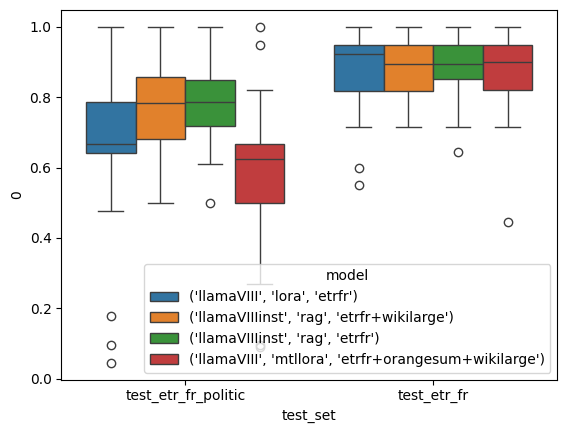

In [151]:
sns.boxplot(eval_df[ETR_cols].agg(lambda x: x.sum()/x.count(), axis=1).to_frame(), y=0, x="test_set", hue="model")

In [162]:
x = eval_df[ETR_cols].agg(lambda x: x.sum()/x.count(), axis=1).to_frame().groupby(["model", "test_set"]).describe().swaplevel()
x.index = x.index.sortlevel(0)[0]
x

0  \
                                                                       count   
test_set            model                                                      
test_etr_fr         ('llamaVIII', 'lora', 'etrfr')                      27.0   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  27.0   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   27.0   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         27.0   
test_etr_fr_politic ('llamaVIII', 'lora', 'etrfr')                      27.0   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  27.0   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   27.0   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         27.0   

                                                                                  \
                                                                            mean   
test_set            model                                                          
test_etr_fr         ('llamaVIII', 'lora', 'etrfr')                      0.877468   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  0.658291   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   0.871227   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         0.580417   
test_etr_fr_politic ('llamaVIII', 'lora', 'etrfr')                      0.887092   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  0.782359   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   0.880646   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         0.777508   

                                                                                  \
                                                                             std   
test_set            model                                                          
test_etr_fr         ('llamaVIII', 'lora', 'etrfr')                      0.116433   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  0.238084   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   0.121170   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         0.212565   
test_etr_fr_politic ('llamaVIII', 'lora', 'etrfr')                      0.086758   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  0.117089   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   0.083509   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         0.132371   

                                                                                  \
                                                                             min   
test_set            model                                                          
test_etr_fr         ('llamaVIII', 'lora', 'etrfr')                      0.550000   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  0.045455   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   0.444444   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         0.090909   
test_etr_fr_politic ('llamaVIII', 'lora', 'etrfr')                      0.642857   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  0.500000   
                    ('llamaVIIIinst', 'rag', 'etrfr')                   0.714286   
                    ('llamaVIIIinst', 'rag', 'etrfr+wikilarge')         0.500000   

                                                                                  \
                                                                             25%   
test_set            model                                                          
test_etr_fr         ('llamaVIII', 'lora', 'etrfr')                      0.816964   
                    ('llamaVIII', 'mtllora', 'etrfr+orangesum+wikil...  0.641711   

In [147]:
eval_df.index.get_level_values("annotator_id").unique()

Index(['jeremie', 'elisa', 'dhia', 'youssef', 'azamat', 'alexis', 'melanie',
       'tarik', 'fabrice'],
      dtype='object', name='annotator_id')

In [117]:
8*3*8

192